<a href="https://colab.research.google.com/github/a193199/Estudos/blob/main/Machine_Learning_Credit_Scoring_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados=pd.read_csv(url)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [ ]:
linhas=dados.shape[0]
colunas=dados.shape[1]

print('A base de dados tem %s linhas e %s colunas.' %(linhas,colunas))

A base de dados tem 1000 linhas e 21 colunas.


In [ ]:
#verificando duplicados
duplicados = dados.duplicated()
duplicados = duplicados.sum()

print('A base tem %s dados duplicados.' %(duplicados))

A base tem 0 dados duplicados.


In [ ]:
#verificando nulos
nulos = dados.isnull()
nulos.sum()


default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [ ]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
#variável resposta independente:
y=dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [ ]:
#retirando variável resposta da base de variáveis dependentes (categoricas e numéricas)
x=dados.drop(columns='default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
#divisão entre base treino e teste
from sklearn.model_selection import train_test_split
#garante que a base será sempre separada da mesma maneira (sem aleatoriedade, tornando o modelo replicável)
SEED=77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

#verificando tamanho da base em relação as linhas
base_treino=treino_x.shape[0]
base_teste=teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste %s elementos' %(base_treino,base_teste))

A base de treino tem 700 elementos e a base de teste 300 elementos


In [ ]:
from sklearn.linear_model import LogisticRegression

#modelo = LogisticRegression(max_iter=1000)
#modelo.fit(treino_x,teste_x)

#só conseguimos rodar o modelo com variáveis numéricas
#entendendo os diferentes valores das variáveis da base
dados['conta_corrente'].unique()



array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [ ]:
a={'< 0 DM':1,
    '0 <= ... < 200 DM':2,
    'no checking account':3,
   '>= 200 DM / salary assignments for at least 1 year':4   
}
dados['conta_corrente'] = dados['conta_corrente'].map(a)
dados.head()

#próximo passo: tratar todas as variáveis categoricas transformando em numericas

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['historico_credito'].unique()


array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [ ]:
a={'critical account/ other credits existing (not at this bank)':1,
    'existing credits paid back duly till now':2,
    'delay in paying off in the past':3,
    'no credits taken/ all credits paid back duly':4,
    'all credits at this bank paid back duly':5      
}
dados['historico_credito'] = dados['historico_credito'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['proposito_emprestimo'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [ ]:
a={'domestic appliances':1,
    '(vacation - does not exist?)':2,
    'radio/television':3,
    'car (new)':4,
    'car (used)':5,
    'business':6,     
    'repairs':7,
    'education':8,
    'furniture/equipment':9,
    'retraining':10
}
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(a)
dados.head(10)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,3,36,2,2,9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,3,24,2,3,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,2,36,2,5,6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,3,12,2,1,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,2,30,1,4,5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [ ]:
dados['reserva_cc'].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [ ]:
a={
    'unknown/ no savings account':1,
    '... < 100 DM':2,
    '500 <= ... < 1000 DM ':3,
    '.. >= 1000 DM ':4,
    '100 <= ... < 500 DM':5
}
dados['reserva_cc'] = dados['reserva_cc'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['tempo_emprego_atual'].unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year '], dtype=object)

In [ ]:
a={
    '.. >= 7 years':1, 
    '1 <= ... < 4 years':2, 
    '4 <= ... < 7 years':3,
    'unemployed':4, 
    '... < 1 year ':5
}
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['sexo_est_civil'].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [ ]:
a={
    'male : single':1, 
    'female : divorced/separated/married':2,
    'male : divorced/separated':3, 
    'male : married/widowed':4
}
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['propriedade'].unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

In [ ]:
a={
    'real estate':1,
    'if not A121 : building society savings agreement/ life insurance':2,
    'unknown / no property':3,
    'if not A121/A122 : car or other, not in attribute 6':4
}
dados['propriedade'] = dados['propriedade'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,none,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['outros_planos_financiamento'].unique()	

array(['none', 'bank', 'stores'], dtype=object)

In [ ]:
a={
    'none':1,
    'bank':2,
    'stores':3
}
dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,own,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,own,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,for free,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['tipo_residencia'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [ ]:
a={
    'own':1,
    'for free':2,
    'rent':3
}
dados['tipo_residencia'] = dados['tipo_residencia'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,skilled employee / official,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,unskilled - resident,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,skilled employee / official,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,skilled employee / official,2,none,yes


In [ ]:
dados['status_emprego'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [ ]:
a={
    'skilled employee / official':1,
    'unskilled - resident':2,
    'management/ self-employed/ highly qualified employee/ officer':3,
    'unemployed/ unskilled - non-resident':4
}
dados['status_emprego'] = dados['status_emprego'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,"yes, registered under the customers name",yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,none,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,none,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,none,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,none,yes


In [ ]:
dados['telefone'].unique()

array(['yes, registered under the customers name ', 'none'], dtype=object)

In [ ]:
a={
    'yes, registered under the customers name ':1,
    'none':2
}
dados['telefone'] = dados['telefone'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,yes
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,yes
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,yes
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,yes
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,yes


In [ ]:
dados['trabalhador_estrangeiro'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
a={
    'yes':1,
    'no':2
}
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


In [ ]:
dados['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [ ]:
a={
    'none':1, 
    'guarantor':2, 
    'co-applicant':3
}
dados['outros_fiadores'] = dados['outros_fiadores'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


In [ ]:
#novas categorizações com dados numericos
y=dados['default']
x=dados.drop(columns='default')

In [ ]:
SEED=77
treino_x, teste_x, treino_y, teste_y=train_test_split(x,y, test_size=0.30, random_state=SEED)
base_treino= treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos' %(base_treino,base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos


In [ ]:
#utilização da regressão
modelo=LogisticRegression(max_iter=1000)
modelo.fit(treino_x,treino_y)

#primeira métrica de desempenho do modelo:
print(modelo.score(treino_x,treino_y))

0.7557142857142857


In [ ]:
#matriz de confusão
#calcula 4 valores que são métricas para avaliação dos modelos
previsoes=modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y,previsoes)
acuracia = round(acuracia,2)*100
acuracia

76.0

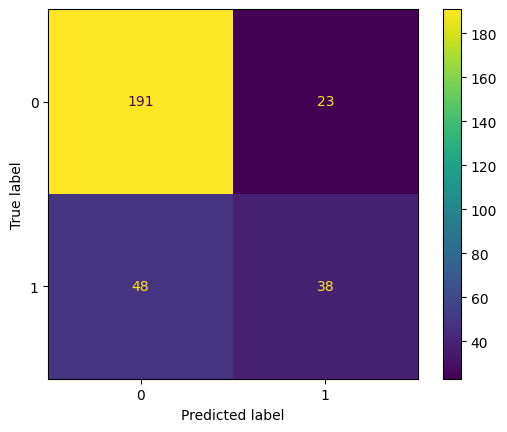

In [ ]:
#calculo da matriz de confusao
#
#class sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)
#não existe mais plot_confusion_matrix -> ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
matriz_confusao=confusion_matrix(teste_y,previsoes)
display=ConfusionMatrixDisplay(matriz_confusao)
display.plot()

#Quadrantes da matriz de confusão:
#[0,0]:verdadeiros positivos -> bons pagadores
#[0,1]:Falsos positivos -> maus classificados como bons
#[1,0]:Falsos negativos -> bons classificados como maus
#[1,1]:Verdadeiros negativos -> ruins classificados como ruins
# neste modelo temos 191+38 predições corretas

In [ ]:
#Metricas derivadas da matriz de confusão
#classificationReport

from sklearn.metrics import classification_report
print(classification_report(teste_y,previsoes))


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.62      0.44      0.52        86

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.68       300
weighted avg       0.75      0.76      0.75       300



roc_auc 0.7603238426429038


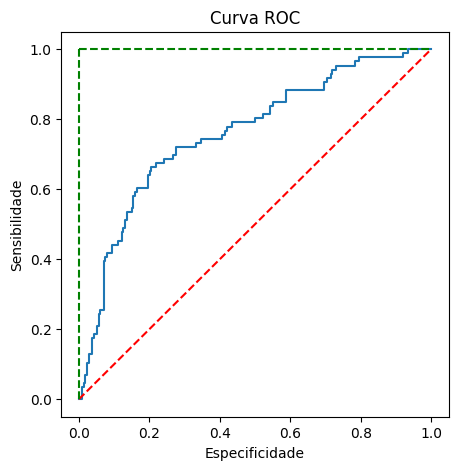

In [ ]:
#gerando gráfico da matriz de confusão - curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]
#tfv: tx de falsos positivos
#tvp: tx de verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c='red') # curva de um modelo aleatorio
plt.plot([0,0], [1,0], ls="--", c="green") #modelo perfeito
plt.plot([1, 1], ls="--", c='green')       #modelo perfeito
plt.show()

In [ ]:
#curva ROC:
#Avalia desempenho do modelo relacionando taxa de verdadeiros positivos e falsos positivos
#Especificidade = VN/(VN+FP) -> taxa de casos em que a categoria alvo foi classificada corretamente
#Sensibilidade=VP/(VP+FN) -> taxa de casos que a categoria 1 foi classificada errada

#AUC: Area sob a curva ROC
#<0,7: ruim
#0,7-0,8: aceitável
#0,8-0,9: excelente
#>0,9 excepcional

In [ ]:
#Analise descritiva
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses',
                     'valor_emprestimo', 'default']
dados[variaveis_analise].describe()                     

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [ ]:
#homem = categoria 1, 3, 4
#mulher = categoria 2

dados['sexo_est_civil'].value_counts()

#temos 310 mulheres
#temos 690 homens

1    548
2    310
4     92
3     50
Name: sexo_est_civil, dtype: int64

In [ ]:
dados['default'].value_counts()

#base desbalanceada pois temos mais negativas do que aprovações
#70/30 de créditos negados/concedidos

0    700
1    300
Name: default, dtype: int64

In [ ]:
import seaborn as sns

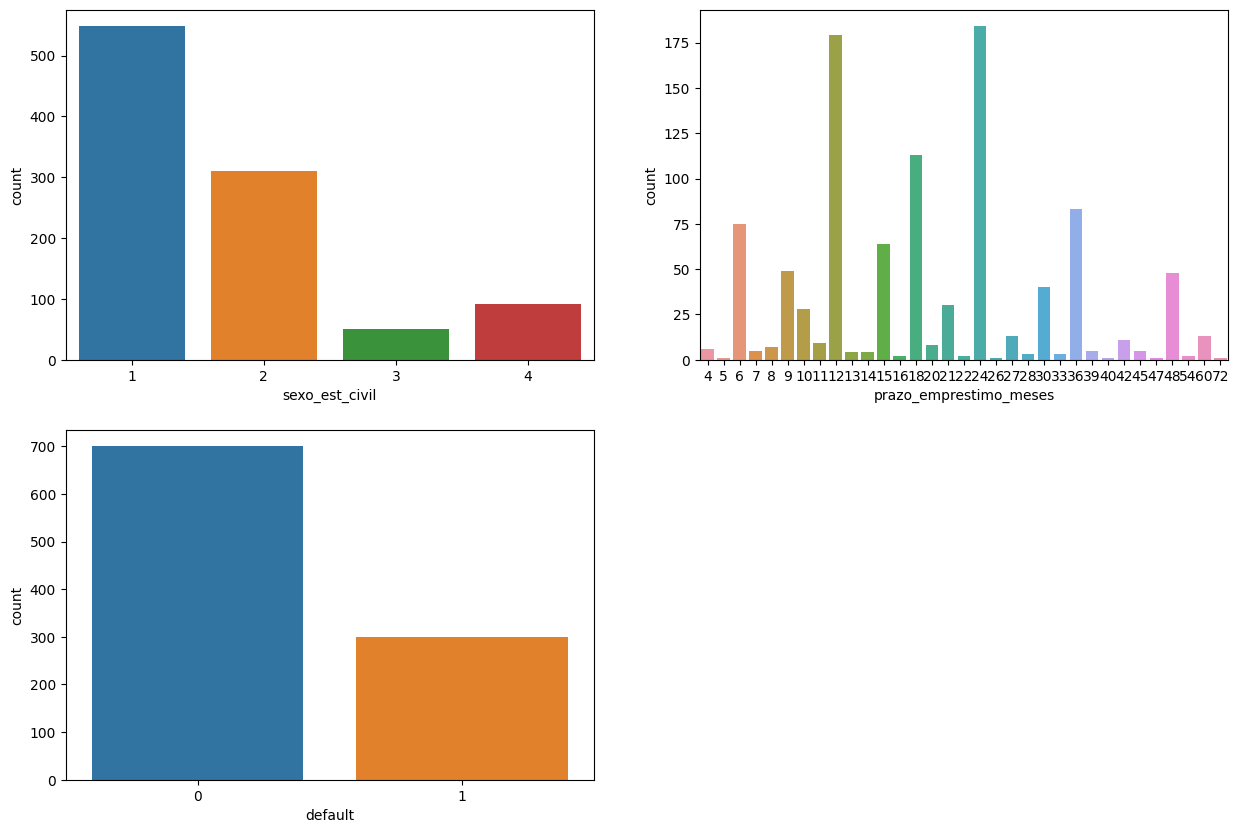

In [ ]:
#histograma:
import matplotlib.lines as lines

histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))
plt.figure(figsize = (15, 10))

for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x = i[1], data= dados)

     
#plt.show()

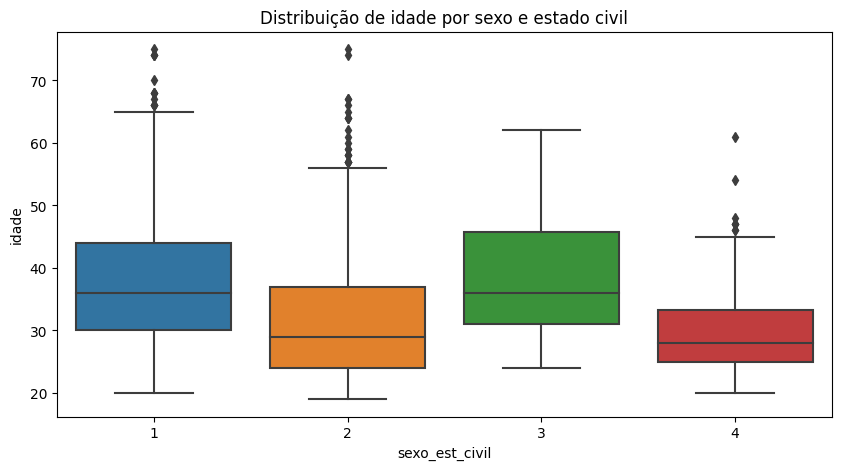

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'sexo_est_civil', y = 'idade', data= dados)
plt.title('Distribuição de idade por sexo e estado civil')
plt.show()

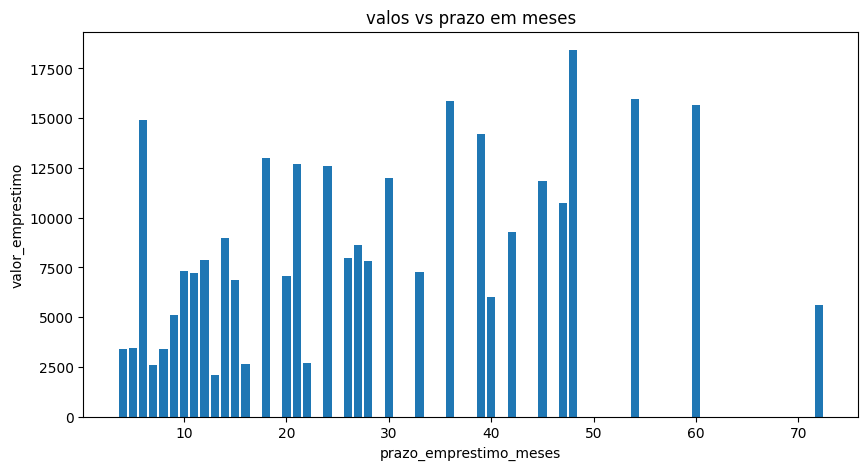

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)

plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('valos vs prazo em meses')
plt.show()

In [ ]:
#informações sensiveis: não podem ser utilizadas em modelos
# origem social e étnica
#condições de saúde
#informações genéticas
#orientação sexual
#convicções políticas


In [ ]:
#Removendo sexo da variável se sexo_est_civil

##'sexo'
## 1 = mulher
## 0 = homem

## varivel de estado civil:
## 1 = solteiro(a)
## 0 = casado, divorciado, viuvo

dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo
0,0,1,6,1,1,1169,1,1,4,1,...,1,67,1,1,2,1,1,1,1,0
1,1,2,48,2,1,5951,2,2,2,2,...,1,22,1,1,1,1,1,2,1,1
2,0,3,12,1,2,2096,2,3,2,1,...,1,49,1,1,1,2,2,2,1,0
3,0,1,42,2,3,7882,2,3,2,1,...,2,45,1,2,1,1,2,2,1,0
4,1,1,24,3,4,4870,2,2,3,1,...,3,53,1,2,2,1,2,2,1,0


In [ ]:
dic_est_civil = {3:1, 5:1, 2:0, 1:0,  4:0}
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,1,0,0
1,1,2,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,1,0,0
3,0,1,42,2,3,7882,2,3,2,1,...,45,1,2,1,1,2,2,1,0,0
4,1,1,24,3,4,4870,2,2,3,1,...,53,1,2,2,1,2,2,1,0,0


In [ ]:
colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados= dados.drop(columns = colunas_retiradas)
base_dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,1,67,1,1,2,1,1,1,1,0
1,1,2,48,2,1,5951,2,2,2,1,...,1,22,1,1,1,1,1,2,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,1,49,1,1,1,2,2,2,1,0
3,0,1,42,2,3,7882,2,3,2,2,...,2,45,1,2,1,1,2,2,1,0
4,1,1,24,3,4,4870,2,2,3,1,...,3,53,1,2,2,1,2,2,1,0


In [ ]:
#função 'roda_modelo', ajuste e validação

def roda_modelo(base_dados, classificador):
    
#separação da base em modelo e variável resposta
    y = base_dados['default']
    x = base_dados.drop(columns = 'default')

#separação entre bases de treino e teste
    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state= SEED)

    base_treino= treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos' %(base_treino, base_teste))
    print(100*'-')

#ajustando modelo com base de teste
    
    modelo=classificador
    modelo.fit(treino_x, treino_y)

###################################################################
#matriz de confusão:
    previsoes=modelo.predict(teste_x)

    matriz_confusao=confusion_matrix(teste_y,previsoes)

    display=ConfusionMatrixDisplay(matriz_confusao)
    display.plot()
    print(100*'-')

#classification report
    print('/nClassificatio Report')
    print(classification_report(teste_y,previsoes))
    print(100*'-')
#curva ROC

    prob_previsao = modelo.predict_proba(teste_x)[:,1]
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_aoc', roc_auc_score(teste_y, prob_previsao))


    plt.figure(figsize=(3,3))
    plt.title('curva ROC')
    plt.plot(tfp, tvp)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.plot([0, 1], ls="--", c='red') # curva de um modelo aleatorio
    plt.plot([0,0], [1,0], ls="--", c="green") #modelo perfeito
    plt.plot([1, 1], ls="--", c='green')       #modelo perfeito
    plt.show()

    return modelo, matriz_confusao


A base de treino tem 700 elementos e a base de teste tem 300 elementos
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassificatio Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.64      0.43      0.51        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.75      0.77      0.75       300

----------------------------------------------------------------------------------------------------
roc_aoc 0.7539121930015215


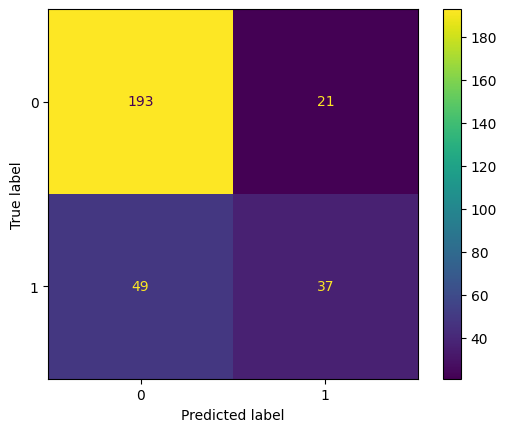

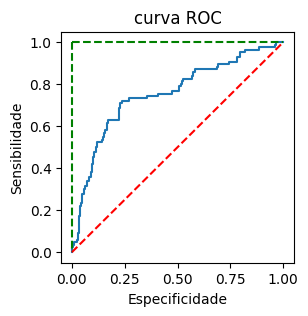

(LogisticRegression(max_iter=1000),
 array([[193,  21],
        [ 49,  37]]))

In [ ]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

In [ ]:
#criando 'faixa_idade' para variável 'idade'
## 18 - 30: 1
## 31 - 40: 2
## 41 - 50: 3
## 51 - 60: 4
## 61 - 70: 5
## 71 - 80: 6

dados['faixa_idade'] = pd.cut(x= dados['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,1,0,0,5
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,1,2,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,1,2,2,2,1,0,0,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,2,1,1,2,2,1,0,0,3
4,1,1,24,3,4,4870,2,2,3,1,...,1,2,2,1,2,2,1,0,0,4


In [ ]:
dados['faixa_prazo_emprestimo'] = pd.cut(x= dados['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,2,1,1,1,1,0,0,5,1
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,1,2,1,1,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,1,1,2,2,2,1,0,0,3,1
3,0,1,42,2,3,7882,2,3,2,1,...,2,1,1,2,2,1,0,0,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,2,2,1,2,2,1,0,0,4,2


In [ ]:
dados['faixa_valor_emprestimo'] = pd.cut(x= dados['valor_emprestimo'], 
                                         bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], 
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,2,1,1,1,1,0,0,5,1,2
1,1,2,48,2,1,5951,2,2,2,2,...,1,1,1,2,1,1,0,1,4,6
2,0,3,12,1,2,2096,2,3,2,1,...,1,2,2,2,1,0,0,3,1,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,1,2,2,1,0,0,3,4,8
4,1,1,24,3,4,4870,2,2,3,1,...,2,1,2,2,1,0,0,4,2,5


In [ ]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados= dados.drop(columns = colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,1,2,1,1,1,1,0,5,1,2
1,1,2,2,1,2,2,2,1,2,1,...,1,1,1,1,2,1,0,1,4,6
2,0,3,1,2,2,3,2,1,3,1,...,1,1,2,2,2,1,0,3,1,3
3,0,1,2,3,2,3,2,2,4,2,...,2,1,1,2,2,1,0,3,4,8
4,1,1,3,4,2,2,3,1,4,3,...,2,2,1,2,2,1,0,4,2,5


A base de treino tem 700 elementos e a base de teste tem 300 elementos
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassificatio Report
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       214
           1       0.64      0.41      0.50        86

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.75      0.76      0.75       300

----------------------------------------------------------------------------------------------------
roc_aoc 0.7688002608128668


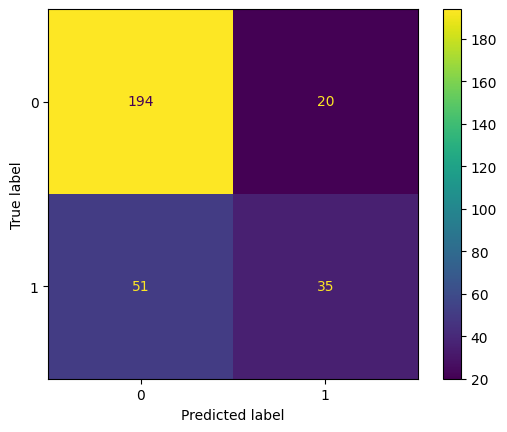

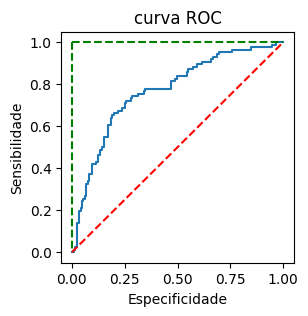

(LogisticRegression(max_iter=1000),
 array([[194,  20],
        [ 51,  35]]))

In [ ]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

In [ ]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados= dados.drop(columns = colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,1,2,1,1,1,1,0,5,1,2
1,1,2,2,1,2,2,2,1,2,1,...,1,1,1,1,2,1,0,1,4,6
2,0,3,1,2,2,3,2,1,3,1,...,1,1,2,2,2,1,0,3,1,3
3,0,1,2,3,2,3,2,2,4,2,...,2,1,1,2,2,1,0,3,4,8
4,1,1,3,4,2,2,3,1,4,3,...,2,2,1,2,2,1,0,4,2,5


In [ ]:
#treinar modelo com a base inteira

modelo = LogisticRegression(max_iter=1000)
y = base_dados['default']
x = base_dados.drop(columns = 'default')
modelo.fit(x, y)

LogisticRegression(max_iter=1000)